# **ANÁLISIS EXPLORATORIO DE DATOS**

El objetivo principal del análisis exploratorio de datos es descubrir patrones, tendencias, relaciones y valores atípicos potenciales en los datos. Para lograr esto, se requiere la exploración y visualización exhaustiva de los datos utilizando diversas técnicas, lo que nos permite comprender mejor su estructura y distribución. La realización de este análisis nos permite obtener una visión más precisa y detallada de la naturaleza de los datos necesarios, lo que a su vez puede ayudarnos a realizar proyectos y tomar decisiones informadas. Vamos a trabajar con el data frame "comp_st6ns1.txt.bz2" para este análisis exploratorio.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.


In [2]:
df = pd.read_csv('disp_st6ns1.txt.bz2', compression="bz2", index_col=0)
pd.set_option('display.max_columns', None)
df.head(3650)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.0,234.401764,229.968914,234.719940,254.104944,255.286532,0.0,10.000000,180.000000,490.000000,326.363636,102228.053977,102374.235795,102232.823153,101765.694602,101681.864347,6.242829,6.954545,7.569890,7.681818,7.927869,0.002250,0.002197,0.002482,0.002582,0.002546,0.000000,0.000909,0.000909,0.012727,0.015455,0.001173,0.001855,0.001882,0.011055,0.014409,277.989785,275.545629,281.609580,284.245322,284.431277,275.391665,274.677163,274.676539,281.715143,280.094230,275.403797,275.548567,281.597326,284.248324,280.159956,273.369282,274.832203,287.590399,288.177906,277.245536,321.394958,315.977009,336.989763,398.046781,380.463043,241.789530,233.140839,237.578452,256.342403,245.431481,0,4.000000,41.636364,104.454545,71.636364,10116900
V2,0.000000,0.000909,0.127273,0.000909,0.0,276.634960,272.369578,268.436640,256.169015,246.565446,0.0,10.000000,153.636364,473.636364,324.545455,101237.345881,101445.642045,101789.610085,101749.945312,102147.579545,8.607066,8.305498,8.913901,5.013589,5.233366,0.002870,0.002404,0.003123,0.002280,0.002117,0.156364,0.037273,0.049091,0.000000,0.000000,0.157891,0.038127,0.049545,0.000673,0.000555,279.558694,280.499734,282.373130,283.015775,283.025221,276.583460,279.423351,279.423351,282.422460,279.242898,279.573525,280.088570,282.368236,282.666554,279.245922,278.293648,278.924006,284.694425,284.870927,277.314348,329.523551,340.445582,350.524819,377.472312,366.501076,204.654873,226.094627,230.027276,248.015693,252.598371,0,3.818182,33.545455,99.272727,71.818182,9262800
V3,0.000000,0.000000,0.000000,0.000000,0.0,218.280002,218.450567,226.860365,255.074577,257.385585,0.0,10.000000,180.000000,490.909091,331.090909,102300.344460,102084.100852,101606.811080,101137.279830,101182.128551,4.890406,6.303983,7.763636,9.690909,9.981818,0.002326,0.002232,0.002372,0.002301,0.002445,0.000000,0.000000,0.003636,0.002727,0.008182,0.000382,0.001618,0.004300,0.002764,0.008427,273.907368,274.061609,281.467610,285.093148,285.315288,271.422397,270.662279,270.661896,281.640877,280.586515,271.456881,274.071555,281.441734,285.093689,280.610393,269.051242,272.963717,285.659995,287.622808,277.124598,304.821664,297.842871,323.796217,387.884591,375.769393,233.928381,228.465100,233.935296,255.359149,253.256739,0,4.000000,41.727273,105.000000,73.636364,10789800
V4,0.000000,0.000000,0.000000,0.000000,0.0,232.681230,208.987453,213.493584,236.729101,241.258593,0.0,20.000000,180.000000,502.727273,337.727273,102858.782670,102961.263494,102762.752841,102299.536932,102142.354403,3.462631,3.787141,4.726539,7.286358,9.511838,0.002348,0.002337,0.002201,0.001921,0.001856,0.000000,0.000000,0.000909,0.018182,0.000000,0.000627,0.000227,0.001800,0.017191,0.000755,279.932409,273.440552,277.859536,281.104914,281.508398,273.484572,272.160051,272.157801,277.961173,277.957520,273.503335,272.745711,277.877747,281.117004,278.551009,272.224768,272.720975,285.145963,286.053497,276.391751,324.674608,308.488836,327.123660,387.025060,371.072865,236.603051,234.644049,238.489481,255.291218,249.140133,0,4.000000,44.000000,108.090909,74.909091,11816700
V5,0.000000,0.000000,0.000000,0.000000,0.0,248.980929,251.472505,

Después de recibir y descomprimir los datos necesarios, hemos impreso las 76 columnas para poder ver los datos con más claridad. Las 75 variables primeras corresponden a los valores de varios parámetros en el punto azul, hay 15 variables independientes pero cada una se calcula 5 veces al día por lo que hay un total de 75, la variables salida representa la energía eléctrica solar acumulada producida durante el día correspondiente y depende de las demás variables.

In [ ]:
df.columns

Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1',

Como parte de este proyecto, se nos pide realizar un estudio sobre la correlación que existe entre las variable proporcionadas y la variable 'salida' cuyo valor numérico se proporciona tan sólo para los 10 primeros años de estudio, para nosotros hallar la función que, a partir de las otras variables, predice un valor aproximado para salida, y probar dicha función en los 2 años de estudio restantes.
Por ello, de momento nos vamos a fijar únicamente en la variable 'salida', ya que es la variable objetivo de nuestros datos.

In [ ]:
df['salida'].describe()

count    4.380000e+03
mean     1.749081e+07
std      7.945135e+06
min      3.000000e+02
25%      1.135185e+07
50%      1.741605e+07
75%      2.459130e+07
max      3.225630e+07
Name: salida, dtype: float64

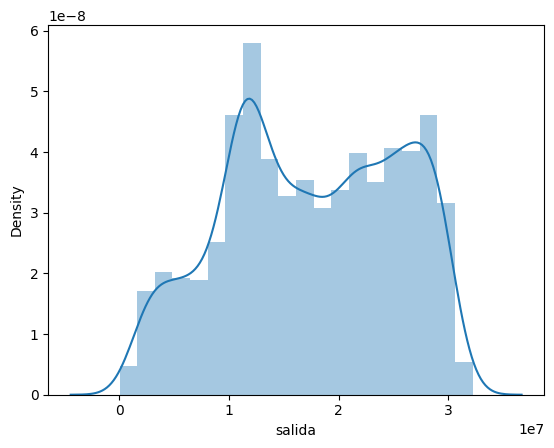

In [ ]:
sns.distplot(df['salida']);

A simple vista podemos observar que hay una desviación en relación a una distribución normal. También observamos que hay dos picos

In [ ]:
# Asimetría y curtosis:

print("Skewness: %f" % df['salida'].skew())
print("Kurtosis: %f" % df['salida'].kurt())

Skewness: -0.125917
Kurtosis: -1.054102


Ahora vamos a estudiar la relación de 'salida' con las otras variables proporcionadas. Tras entender lo que significa cada una de ellas y que cada una corresponde a una hora del día distinta, creemos que las variables que más influyen sobre el resultado de 'salida' son dswrf_sfc ya que se trata de la media del flujo radiativo de onda corta que llega desde el cielo a la superficie(descendiente), es decir, en donde se encuentran las plantas energéticas, ya que la radiación de onda corta contiene un nivel más alto de energía que la de onda larga, y por lo tanto influye en mayor medida en 'salida'. En cuanto a la hora, creemos que el que más influye serían aquellas horas que corresponden a la tarde, pues es cuando la temperatura suele ser la más alta (2 y 3 correspondientes a las 15h y 18h).

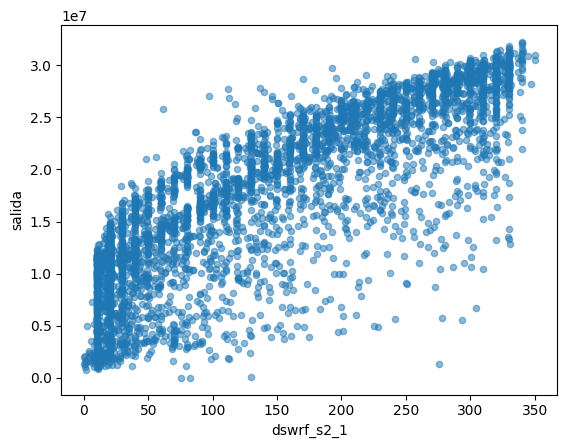

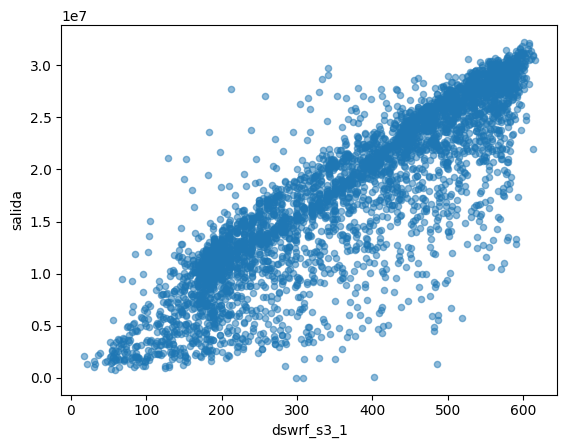

In [ ]:
var1 = 'dswrf_s2_1'
var2 = 'dswrf_s3_1'
data = pd.concat([df['salida'], df[var1]], axis=1)
data.plot.scatter(x=var1, y='salida', alpha = 0.5);

data = pd.concat([df['salida'], df[var2]], axis=1)
data.plot.scatter(x=var2, y='salida', alpha = 0.5);

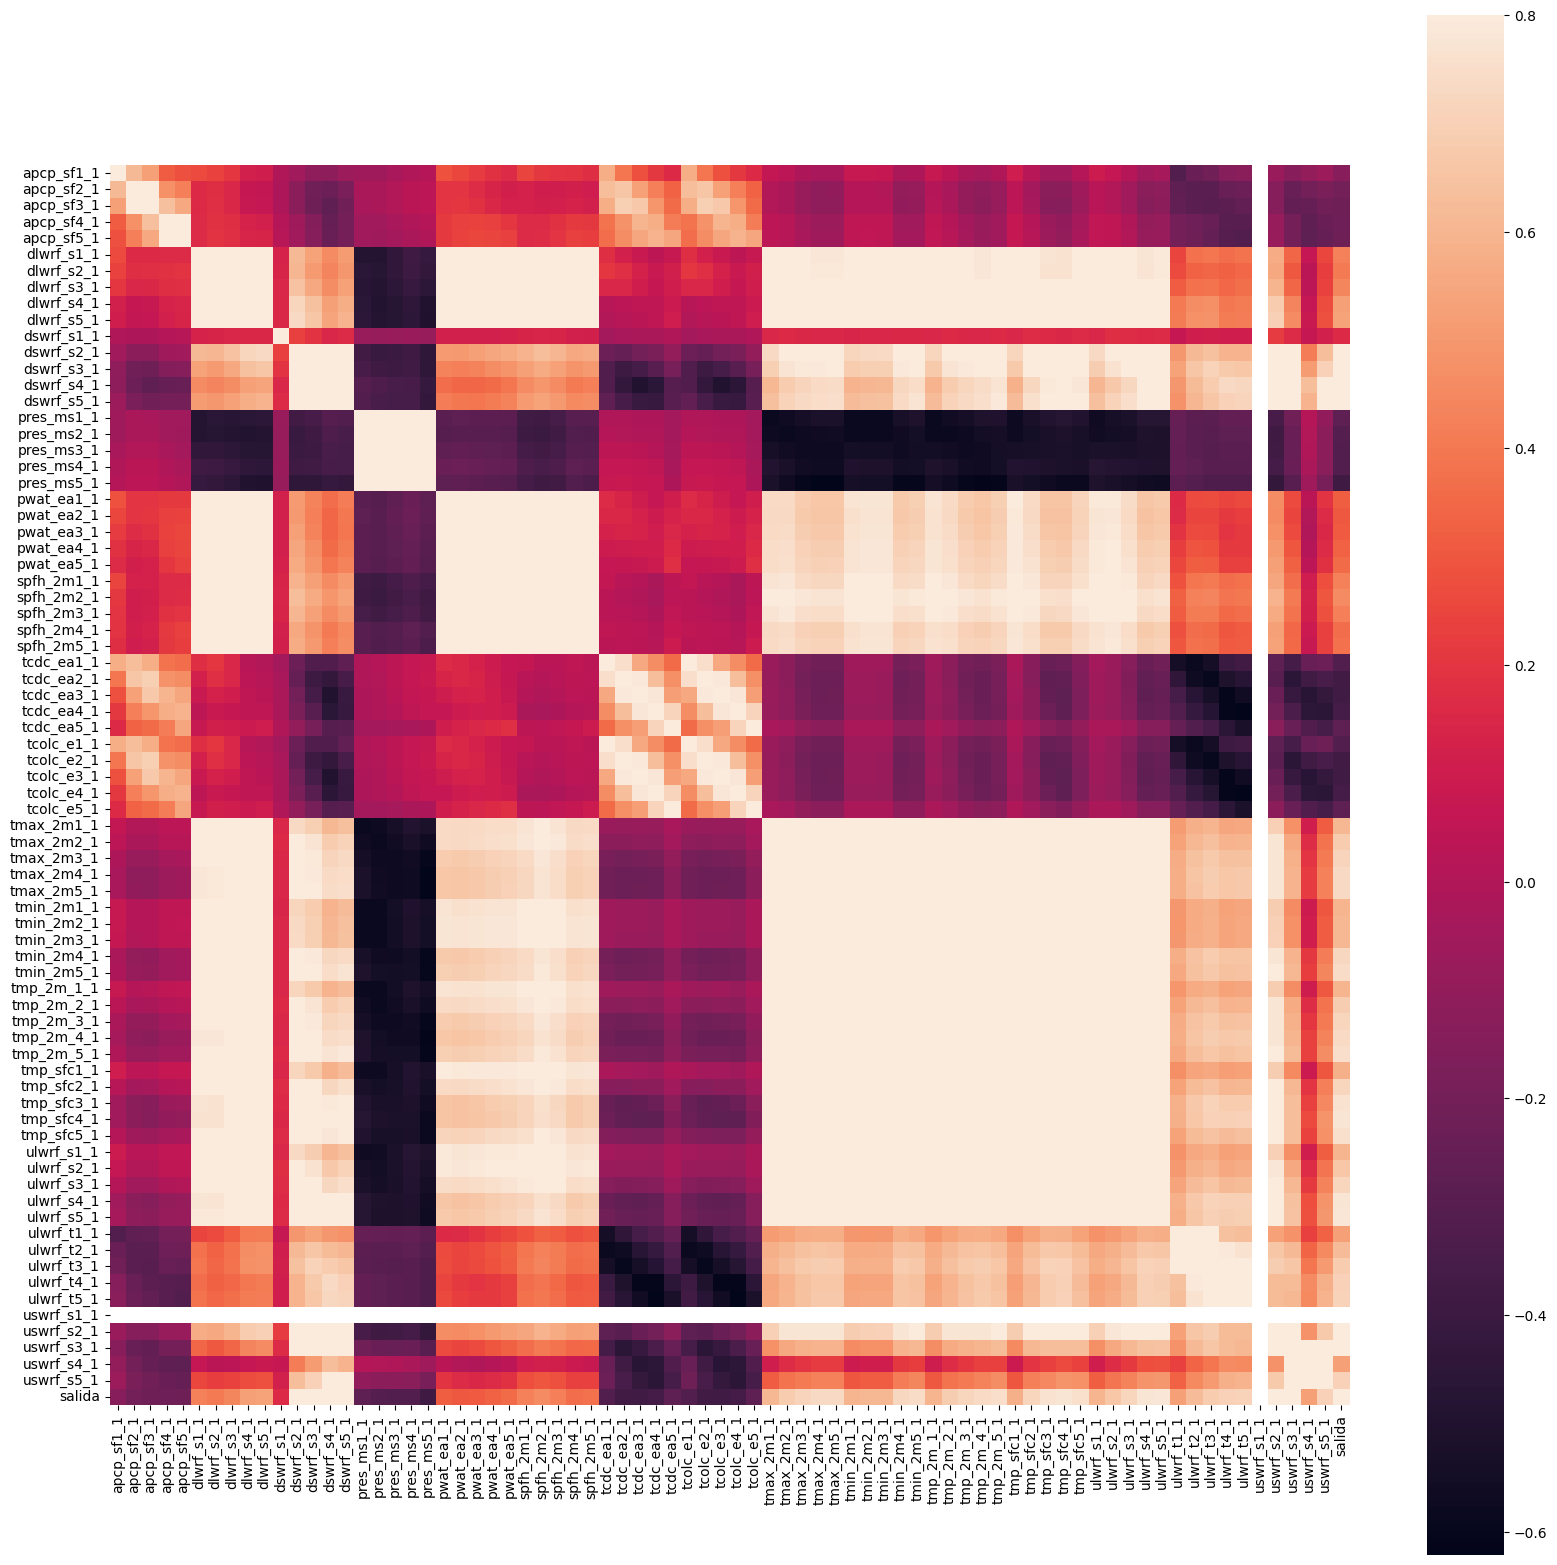

In [3]:
# Matriz de correlación:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)

to_drop = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.95:
            colname = corrmat.columns[i]
            to_drop.add(colname)

Para obtener una mejor visualización de la correlación existente entre las variables, hemos generado un mapa de calor (heatmap). En este gráfico, los tonos más oscuros indican una alta correlación negativa entre variables, mientras que los tonos más claros indican una alta correlación positiva.

In [ ]:
total_var = 0

for i in to_drop:
  total_var += 1
  print(i)

print("Numero de variables con correlacion mayor a 0.95: ",total_var)

spfh_2m3_1
spfh_2m2_1
tmp_2m_1_1
tmp_sfc1_1
uswrf_s2_1
pwat_ea2_1
spfh_2m5_1
dswrf_s5_1
tcolc_e3_1
tmp_sfc4_1
dlwrf_s2_1
pwat_ea5_1
pres_ms2_1
dlwrf_s4_1
pres_ms5_1
pwat_ea4_1
tmp_2m_2_1
ulwrf_s3_1
dlwrf_s3_1
tcolc_e5_1
tmin_2m4_1
tmax_2m5_1
tmp_sfc5_1
tcolc_e1_1
pres_ms3_1
tmp_2m_4_1
tmax_2m2_1
ulwrf_t5_1
tmp_2m_5_1
tcolc_e2_1
ulwrf_t3_1
tcolc_e4_1
tmp_sfc3_1
ulwrf_s2_1
tmin_2m1_1
spfh_2m4_1
ulwrf_s4_1
ulwrf_s5_1
dswrf_s3_1
pres_ms4_1
pwat_ea3_1
dlwrf_s5_1
tmax_2m4_1
tmp_2m_3_1
ulwrf_s1_1
tmin_2m3_1
tmp_sfc2_1
tmin_2m5_1
tmax_2m3_1
tmin_2m2_1
Numero de variables con correlacion mayor a 0.95:  50


Estas son las variables con un nivel de correlacion mayor a 0.95, por lo que el eliminar estas 50 variables, no afectaría los resultados de las pruebas realizadas sobre la base de datos, logrando así reducir su dimensionalidad. De la misma manera y como se puede ver en la matriz de correlacion, la variable uswrf_s1_1 tambien podría ser elimininada debido a que no aporta informacion (todos sus valores son iguales a 0).

In [ ]:
corr = df.corr()
corr[['salida']].sort_values(by = 'salida',ascending = False).style.background_gradient()

,salida
salida,1.000000
dswrf_s3_1,0.877270
dswrf_s5_1,0.876034
dswrf_s4_1,0.873229
uswrf_s2_1,0.842086
dswrf_s2_1,0.829018
uswrf_s3_1,0.798940
ulwrf_s5_1,0.778697
tmp_sfc4_1,0.777438
ulwrf_s4_1,0.775706


Podemos observar el valor real de correlación existente entre las variables de entrada y la variable de salida. Es importante destacar que cuanto mayor sea el grado de correlación entre una variable y la variable de salida, mayor será su influencia en esta última, lo cual resulta de gran interés para nuestro análisis.

Cabe destacar lo siguiente:
1. Las variables dswrf_sfc son las que más correlacion tiene con la variable 'salida' y se corresponden a la media de radiación de onda corta que llega del cielo en la superficie, más específicamente a las horas 2,3,4,5 (12h, 15h, 18h y 24h respectivamente)
2. Las variables uswrf_sfc que corresponde a la radiación de onda corta que procede del suelo sobre la superficie a las horas 2 y 3 también tienen un alto nivel de correlación.
3. A la hora 5, la variable ulwrf_sfc que corresponde a la radiación de onda larga que procede del suelo sobre la superficie tiene alta correlación con la salida.
4. Podemos destacar como la variables más correlacionada positiva es mucho mayor que la negativa (|0.87|>|-0.37|)

# **MÉTODOS BÁSICOS**

In [3]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Dividir datos en train y test
x = df.loc[:,df.columns != 'salida']
y = df['salida']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=3650, test_size=730, shuffle=False)

# Escalar las características utilizando MinMaxScaler por si los necesitamos en algun momento
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

np.random.seed(6)
tscv = TimeSeriesSplit(n_splits=5)

## KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

knn = KNeighborsRegressor()
    
# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(knn, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(knn, x_train_scaled, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
end = time.time()
rmse = -aux

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 3345443.64
MAE: 2328967.64
Tiempo de ejecución: 0.23 segundos


Creamos y entrenamos un modelo KNN con los parámetros por omisión para sacar el RMSE y MAE. 

### Ajuste de hiperparámetros

In [41]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

# Creamos el modelo
knn = KNeighborsRegressor()

# Seleccion de hiperparametros
param_grid = {'n_neighbors': list(range(1, 20)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'metric': ['manhattan', 'euclidean', 'chebyshev', 'minkowski']}

# Hacemos gridsearch y entrenamos el modelo
grid_search = GridSearchCV(knn, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Calculamos rmse y sacamos mejores hiperparametros
best_model = grid_search.best_estimator_
rmse = grid_search.best_score_

end = time.time()

# Imprimir resultados
print('Mejores parámetros:', grid_search.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)


Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
RMSE: 3,312,195.3179345736
Tiempo de ejecución total:  128.37430000305176


Usamos la técnica de gridsearch para encontrar los mejores hiperparámetros que nos den el valor más pequeño de RMSE como hemos especificado con 'neg_root_mean_squared_error'.

## ARBOL DE REGRESIÓN


In [49]:
from sklearn import metrics
from sklearn import tree
import math

# Creamos el modelo segun los hiperparametros
clf = tree.DecisionTreeRegressor()
    
# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(clf, x_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(clf, x_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
end = time.time()
rmse = np.sqrt(-aux)

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 4423518.11
MAE: 2890834.88
Tiempo de ejecución: 0.76 segundos


###Ajuste de hiperparametros

In [50]:
from sklearn.tree import DecisionTreeRegressor

start = time.time()

clf = DecisionTreeRegressor()

# Definir el grid de parámetros
param_grid = {'max_depth': list(range(1, 21, 2)),
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

# Calculamos mejores parametros
grid_search = GridSearchCV(clf, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Scamos mejor modelo y entrenamos
best_model = grid_search.best_estimator_

# Calculamos rmse
rmse = grid_search.best_score_

end = time.time()

# Imprimimos resultados
print('Mejores parámetros:', grid_search.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)



Mejores parámetros: {'max_depth': 13, 'min_samples_leaf': 20, 'min_samples_split': 10}
RMSE: 3,588,503.7646035985
Tiempo de ejecución total:  56.55306935310364


##Regresion lineal

In [44]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

start = time.time()

clf = LinearRegression()

# Compute cross-validation scores for RMSE
rmse = np.sqrt(-cross_val_score(clf, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_squared_error'))

# Compute cross-validation scores for MAE
mae = -cross_val_score(clf, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_absolute_error')

end = time.time()

print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecucion: ", end-start)


RMSE: 3275785.79
MAE: 2311307.48
Tiempo de ejecucion:  0.3490753173828125


###Ajuste de hiperparametros

In [10]:
start = time.time()
clf = LinearRegression()

# Definir la rejilla de parámetros a buscar
parametrosLR = {'fit_intercept': [True, False]}

# Calculamos mejores parametros
grid_search = GridSearchCV(clf, parametrosLR, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Scamos mejor modelo y entrenamos
best_model = grid_search.best_estimator_

# Calculamos rmse
rmse = grid_search.best_score_

end = time.time()

# Imprimimos resultados
print('Mejores parámetros:', grid_search.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)


Mejores parámetros: {'fit_intercept': False}
RMSE: 3,269,966.631117926
Tiempo de ejecución total:  0.25623059272766113


## Conlusiones

Este apartado está dedicado a comparar los valores que tenemos en todos los métodos básicos, comprando los valores entre ellos y sus hiperparámetros por omisión


Podemos ver que reduciendo la dimesionalidad hemos conseguidos resultados mejores.
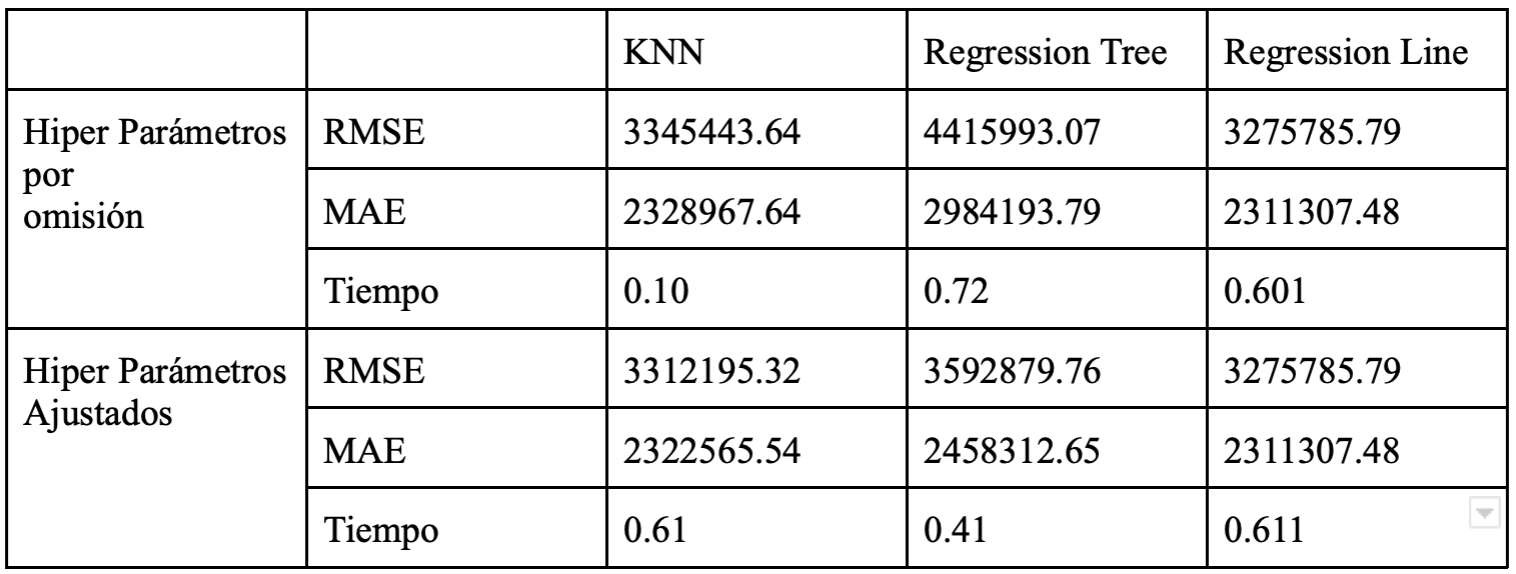


In [11]:
# KNN

# Creamos modelo con los mejores hiperparametros
knn = KNeighborsRegressor(metric= 'manhattan', n_neighbors= 9, p= 1, weights= 'distance')

# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(knn, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(knn, x_train_scaled, y_train, cv=tscv, scoring='neg_root_mean_squared_error')
end = time.time()
rmse = -aux

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 3312195.32
MAE: 2322565.54
Tiempo de ejecución: 0.71 segundos


In [53]:
# Arbol de Regresion

# Creamos el modelo segun los hiperparametros
clf = tree.DecisionTreeRegressor(max_depth= 13, min_samples_leaf= 20, min_samples_split= 10)
    

# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(clf, x_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(clf, x_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
end = time.time()
rmse = np.sqrt(-aux)

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))



RMSE: 3588025.50
MAE: 2456383.55
Tiempo de ejecución: 0.49 segundos


In [45]:
# Linear Regression

start = time.time()
clf = LinearRegression(fit_intercept= True)

# Compute cross-validation scores for RMSE
rmse = np.sqrt(-cross_val_score(clf, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_squared_error'))

# Compute cross-validation scores for MAE
mae = -cross_val_score(clf, x_train_scaled, y_train, cv=tscv, scoring='neg_mean_absolute_error')

end = time.time()

print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecucion: ", end-start)


RMSE: 3275785.79
MAE: 2311307.48
Tiempo de ejecucion:  0.3892703056335449


Podemos notar que los errores de la regresion linear se mantienen iguales. Esto se debe a que solo tiene 4 hiperparametros segun sklearn, siendo el más importante de ellos fit_intercept, el cual es un booleano, por lo que solo puede tomar dos valores posibles. En nuestro caso, tras realizar el ajuste de hiperparametros, eligió como el mejor hiperparametro fit_intercept=True, el cual coincide con el valor por defecto. Al no haber cambiado nada de los hiperparametros por omision al ajuste de hiperparametros, el error se mantiene igual.


## Reducción de dimensionalidad

<Axes: >

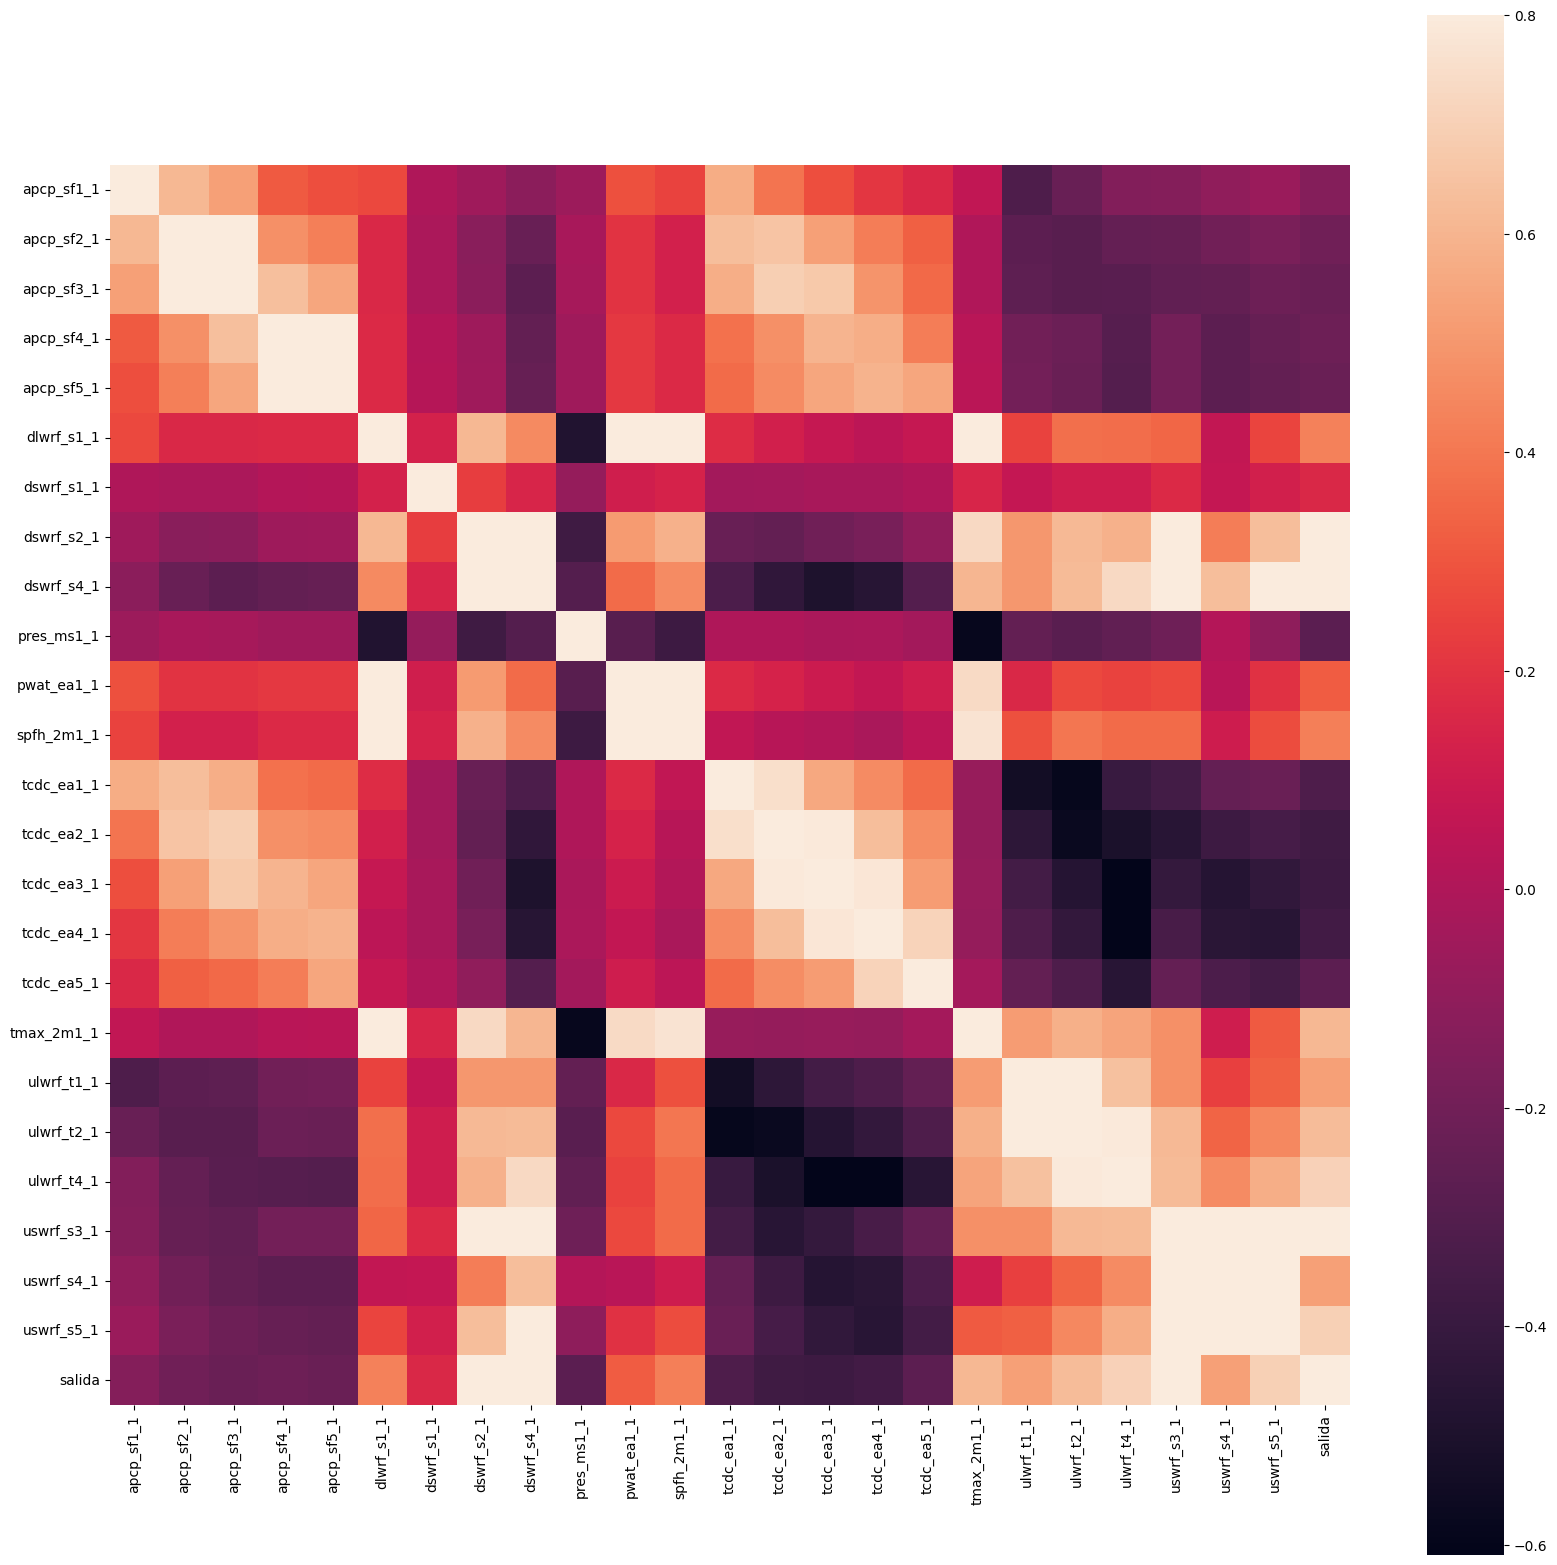

In [9]:
# Matriz de correlación:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

corrmat =df.corr()
to_drop = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.95:
            colname = corrmat.columns[i]
            to_drop.add(colname)

# Hacemos drop sobre esas variables
df_dropped = df.drop(to_drop, axis=1)
df_dropped = df_dropped.drop('uswrf_s1_1',axis=1)

# Imprimimos el segundo heatmap
corrmat = df_dropped.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)


In [61]:
# Dividir datos en train y test
x_dropped = df_dropped.loc[:,df_dropped.columns != 'salida']
y_dropped = df['salida']
x_train_dropped, x_test_dropped, y_train_dropped, y_test_dropped = train_test_split(x, y, train_size=3650, test_size=730, shuffle=False)

# Escalar las características utilizando MinMaxScaler por si los necesitamos en algun momento
scaler = MinMaxScaler()
x_train_scaled_dropped = scaler.fit_transform(x_train_dropped)
x_test_scaled_dropped = scaler.transform(x_test_dropped)

np.random.seed(6)
tscv = TimeSeriesSplit(n_splits=5)

In [62]:
# KNN

# Creamos modelo con los mejores hiperparametros
knn = KNeighborsRegressor(metric= 'manhattan', n_neighbors= 9, p= 1, weights= 'distance')
    
# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(knn, x_train_scaled_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(knn, x_train_scaled_dropped, y_train_dropped, cv=tscv, scoring='neg_root_mean_squared_error')
end = time.time()
rmse = -aux

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))

RMSE: 3312195.32
MAE: 2322565.54
Tiempo de ejecución: 0.61 segundos


In [54]:
# Arbol de Regresion

# Creamos el modelo segun los hiperparametros
clf = tree.DecisionTreeRegressor(max_depth= 13, min_samples_leaf= 20, min_samples_split= 10)
    
# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(clf, x_train_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(clf, x_train_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_squared_error')
end = time.time()
rmse = np.sqrt(-aux)

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 3591003.15
MAE: 2456769.84
Tiempo de ejecución: 0.99 segundos


In [47]:
# Linear Regression

start = time.time()
clf = LinearRegression()

# Compute cross-validation scores for RMSE
rmse = np.sqrt(-cross_val_score(clf, x_train_scaled_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_squared_error'))

# Compute cross-validation scores for MAE
mae = -cross_val_score(clf, x_train_scaled_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_absolute_error')

end = time.time()

print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecucion: ", end-start)

RMSE: 3275785.79
MAE: 2311307.48
Tiempo de ejecucion:  0.5116851329803467


# MÉTODOS AVANZADOS

## SVM

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import time


# Definir el pipeline
svr = SVR()

# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(svr, x_train_scaled_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(pipeline, x_train_dropped, y_train_dropped, cv=tscv, scoring='neg_root_mean_squared_error')
end = time.time()
rmse = -aux

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 8013610.41
MAE: 6907412.75
Tiempo de ejecución: 3.26 segundos


###Ajuste de hiperparametros

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
# Search space
param_grid = {'SVM__C': [0.1, 10,100 , 1000, 10000, 100000, 1000000], 'SVM__gamma': [0.01, 0.1, 1]}

# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Train the self-adjusting process
np.random.seed (6)
hpo_regr.fit(x_train_dropped, y_train_dropped)

best_model = hpo_regr.best_estimator_

# Calculamos rmse
rmse = hpo_regr.best_score_

end = time.time()

# Imprimimos resultados
print('Mejores parámetros:', hpo_regr.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)


Mejores parámetros: {'SVM__C': 1000000, 'SVM__gamma': 0.1}
RMSE: 3,278,649.021396352
Tiempo de ejecución total:  57.05021858215332


En este caso, el programa devuelve como los mejores hiperparámetros C=1000000 y gamma = 0.1.
Al ir añadiendo cada vez valores más grandes a la lista de C, notamos que cada nuevo valor que añadiamos que fuera el mas grande la lista era elegido como el mejor hiperparametro. 

Creemos que esto se debe a que, ya que el objetivo de SVR es encontrar un hiperplano con el mayor margen minimo que a la vez separe la mayor cantidad de instancias posibles, el parametro C es el encargado de determinar la separacion de las instancias y, en nuestro caso teniendo en cuenta nuestra base de datos, lo mejor es que C sea el mayor posible. Para demostrarlo a continuacion ejecutaremos en mismo codigo unicamente con el valor mas bajo de C que hemos considerado y no es el default (C=1), el 0.1


In [27]:
start = time.time()
# Search space
param_grid = {'SVM__C': [0.1], 'SVM__gamma': [0.01, 0.1, 1]}

# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Train the self-adjusting process
np.random.seed (6)
hpo_regr.fit(x_train_dropped, y_train_dropped)

best_model = hpo_regr.best_estimator_

# Calculamos rmse
rmse = hpo_regr.best_score_

end = time.time()

# Imprimimos resultados
print('Mejores parámetros:', hpo_regr.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)


Mejores parámetros: {'SVM__C': 0.1, 'SVM__gamma': 0.1}
RMSE: 8,013,815.364877905
Tiempo de ejecución total:  10.265902996063232
Execution time:  10.267334222793579


Al ser C=0.1, el resultado del error empeora un poco comparado con el valor de C=1 (el valor de C por omisión), y considerablemente comparado con C=1000000.
Así, podriamos concluir que para nuestra base de datos, lo mejor es elegir el mayor valor de C posible.

## RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestRegressor
import time

rand_for = RandomForestRegressor()
    
# Calcular las puntuaciones de validación cruzada para MAE
mae = -cross_val_score(rand_for, x_train_dropped, y_train_dropped, cv=tscv, scoring='neg_mean_absolute_error')

start = time.time()
# Calcular las puntuaciones de validación cruzada para RMSE
aux = cross_val_score(rand_for, x_train_dropped, y_train_dropped, cv=tscv, scoring='neg_root_mean_squared_error')
end = time.time()
rmse = -aux

# Imprimimos resultados
print("RMSE: {:.2f}".format(np.mean(rmse)))
print("MAE: {:.2f}".format(np.mean(mae)))
print("Tiempo de ejecución: {:.2f} segundos".format(end-start))


RMSE: 3163131.16
MAE: 2173644.61
Tiempo de ejecución: 47.90 segundos


###Ajuste de hiperparametros



In [34]:
from sklearn.model_selection import GridSearchCV

start = time.time()

rf = RandomForestRegressor()

# Definir el grid de parámetros
param_grid = {'max_depth': [1,2,3],
              'min_samples_split': [1, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'n_estimators':[30, 50, 100, 120]
              }

# Calculamos mejores parametros
grid_search = GridSearchCV(rf, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_dropped, y_train_dropped)

# Scamos mejor modelo y entrenamos
best_model = grid_search.best_estimator_

# Calculamos rmse
rmse = grid_search.best_score_

end = time.time()

# Imprimimos resultados
print('Mejores parámetros:', grid_search.best_params_)
print("RMSE: {:,}".format(-rmse))
print('Tiempo de ejecución total: ', end-start)

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
RMSE: 3,427,595.1896674195
Tiempo de ejecución total:  447.19456028938293


Para el ajuste de hiperparametros de los random forest, hemos utilizado los mismos parametros que en los arboles de regresión, debido a la estructura de los forests, que estan formados por arboles, y además hemos añadido una nuevo llamado 'n_estimators', que decide el numero de arboles presentes en el forest.